In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# DATA PREPROCESSING

In [13]:
df=pd.read_csv('SocialMediaSentiment.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
print('Missing Values:\n',df.isnull().sum())

Missing Values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [6]:
newdata=df.groupby('Platform').size().rename_axis('PlatformCategory').reset_index(name='Count')
newdata.head

<bound method NDFrame.head of   PlatformCategory  Count
0        Facebook     231
1       Instagram     258
2         Twitter     128
3        Twitter      115>

In [7]:
labels=newdata.PlatformCategory
values=newdata.Count

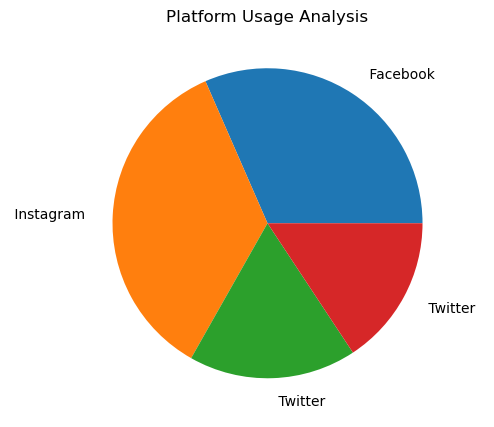

In [8]:
plt.figure(figsize=(5,18))
plt.pie(values,labels=labels, labeldistance=1.15)
plt.title("Platform Usage Analysis")
plt.show()

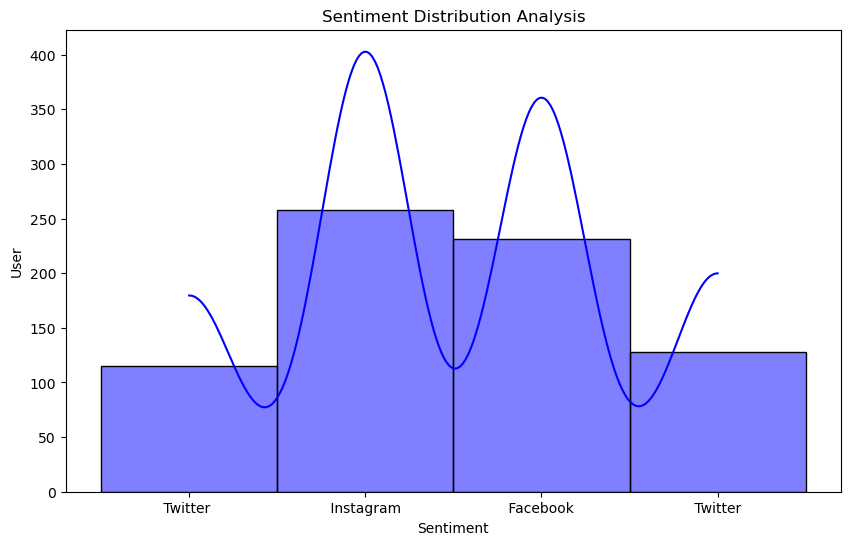

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['Platform'],bins=20,kde=True,color='blue')
plt.title('Sentiment Distribution Analysis')
plt.xlabel('Sentiment')
plt.ylabel('User')
plt.show()

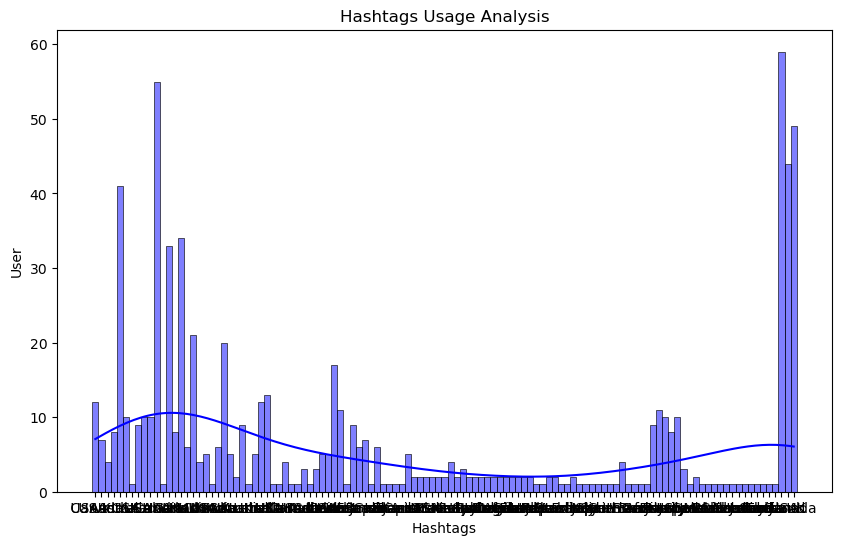

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Country'],bins=20,kde=True,color='blue')
plt.title('Hashtags Usage Analysis')
plt.xlabel('Hashtags')
plt.ylabel('User')
plt.show()

C:\Users\sange\AppData\Local\Temp\ipykernel_30532\540915320.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Timestamp',y='User',data=df,estimator=sum,ci=None)


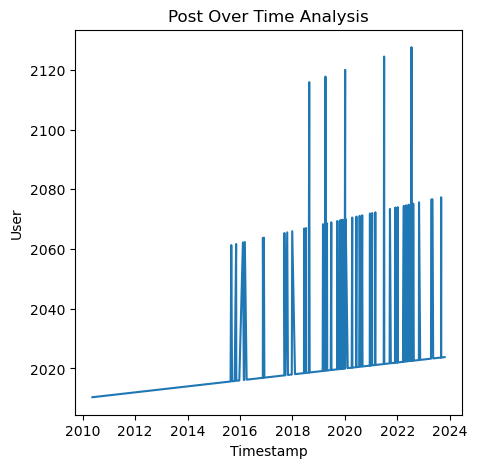

In [19]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(5,5))
sns.lineplot(x='Timestamp',y='User',data=df,estimator=sum,ci=None)
plt.title('Post Over Time Analysis')
plt.xlabel('Timestamp')
plt.ylabel('User')
plt.show()

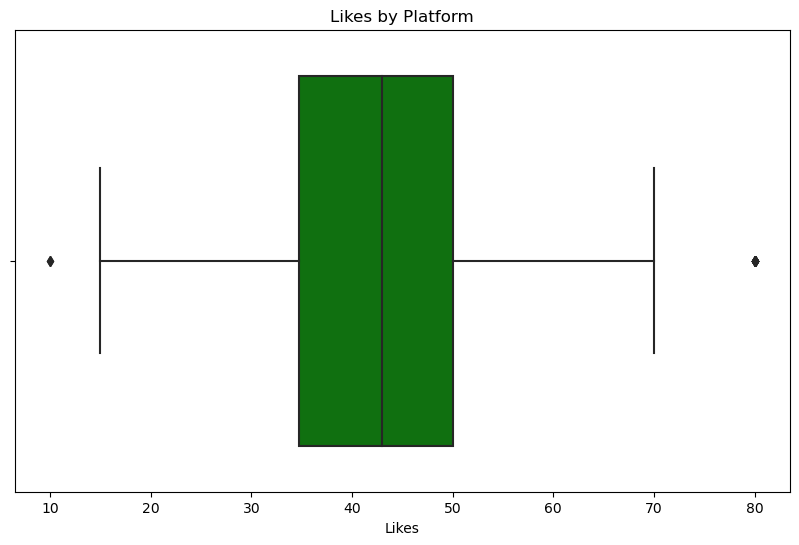

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Likes'],color='green')
plt.title('Likes by Platform')
plt.xlabel('Likes')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, ' Facebook '),
  Text(1, 0, ' Instagram '),
  Text(2, 0, ' Twitter '),
  Text(3, 0, ' Twitter  ')])

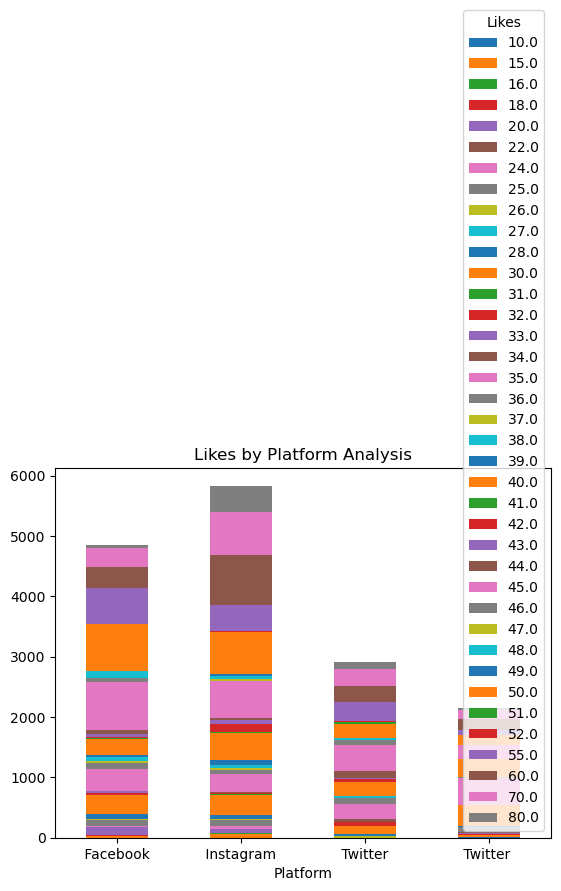

In [9]:
agg_df= df.groupby(['Platform','Likes'])['Retweets'].sum().unstack().fillna(0)
agg_df
agg_df.plot(kind='bar', stacked=True)
plt.title('Likes by Platform Analysis')
plt.xticks(rotation=0,ha='center')

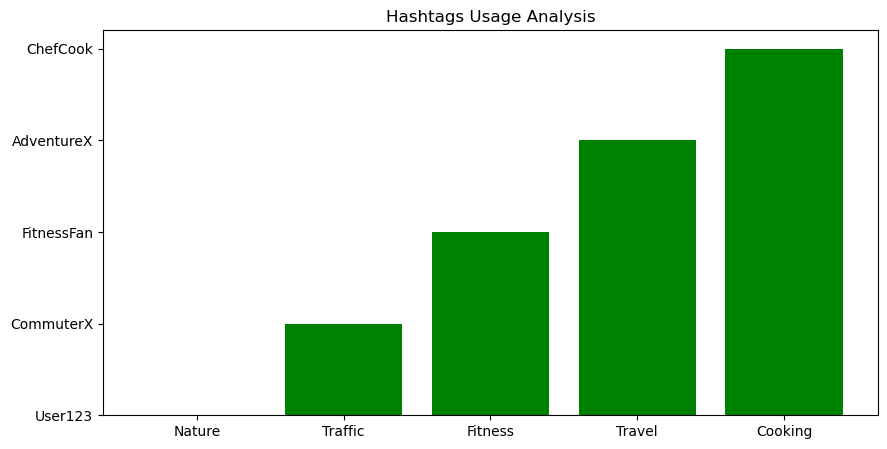

In [16]:
Hashtags=["Nature","Traffic","Fitness","Travel","Cooking"]
User=["User123","CommuterX","FitnessFan","AdventureX","ChefCook"]
plt.figure(figsize=(10,5))
plt.bar(Hashtags,User, color="g")
plt.title("Hashtags Usage Analysis")
plt.show()
plt.close()

# EXPLORATORY DATA ANALYSIS

In [41]:
basic_stats=df[['Likes']].describe()
print("Likes Analysis:\n",basic_stats)

Likes Analysis:
             Likes
count  732.000000
mean    42.901639
std     14.089848
min     10.000000
25%     34.750000
50%     43.000000
75%     50.000000
max     80.000000


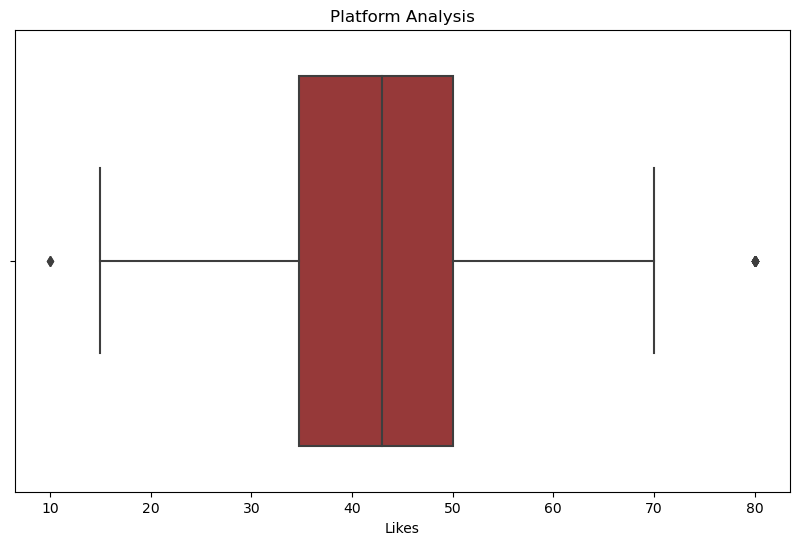

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Likes'],color='brown')
plt.title('Platform Analysis')
plt.xlabel('Likes')
plt.show()

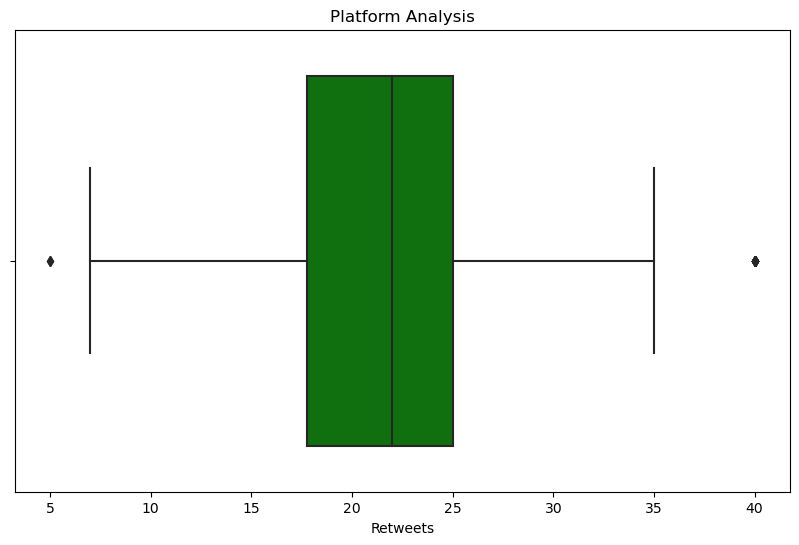

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Retweets'],color='green')
plt.title('Platform Analysis')
plt.xlabel('Retweets')
plt.show()

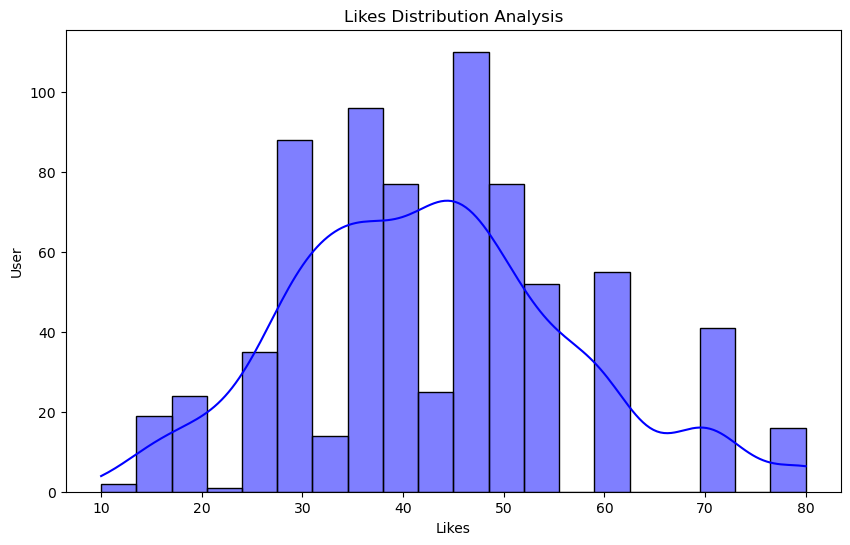

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Likes'],bins=20,kde=True,color='blue')
plt.title('Likes Distribution Analysis')
plt.xlabel('Likes')
plt.ylabel('User')
plt.show()

# RFM ANALYSIS

In [17]:
df_recency= df.groupby(by='Platform', as_index=False)['Likes'].max()
df_recency.columns=['Platform','Unnamed: 0']
recent_date= df_recency['Unnamed: 0'].max()
df_recency['Recency']= df_recency['Unnamed: 0'].apply(
    lambda x:(recent_date - x))
df_recency.head()

,Platform,Unnamed: 0,Recency
0,Facebook,80.0,0.0
1,Instagram,80.0,0.0
2,Twitter,80.0,0.0
3,Twitter,80.0,0.0


In [20]:
frequency_df = df.drop_duplicates().groupby(by=['Platform'],as_index=False)['Unnamed: 0'].count()
frequency_df.columns=['Platform','Frequency']
frequency_df.head()

,Platform,Frequency
0,Facebook,231
1,Instagram,258
2,Twitter,128
3,Twitter,115


In [28]:
df['Monetary']= df['Retweets']*df['Likes']
monetary_df  = df.groupby(by='Platform', as_index=False)['Monetary'].sum()
monetary_df_columns =['Platform', 'Monetary']
monetary_df.head()

,Platform,Monetary
0,Facebook,221609.0
1,Instagram,294535.0
2,Twitter,141796.0
3,Twitter,90122.0


In [30]:
rf_df=df_recency.merge(frequency_df,on='Platform')
rfm_df=rf_df.merge(monetary_df, on='Platform').drop(columns='Platform')
rfm_df.head()

,Unnamed: 0,Recency,Frequency,Monetary
0,80.0,0.0,231,221609.0
1,80.0,0.0,258,294535.0
2,80.0,0.0,128,141796.0
3,80.0,0.0,115,90122.0


In [31]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,Unnamed: 0,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,80.0,0.0,231,221609.0,100.0,75.0,75.0
1,80.0,0.0,258,294535.0,100.0,100.0,100.0
2,80.0,0.0,128,141796.0,100.0,50.0,50.0
3,80.0,0.0,115,90122.0,100.0,25.0,25.0


# VISUALIZATION

C:\Users\sange\anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sange\anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


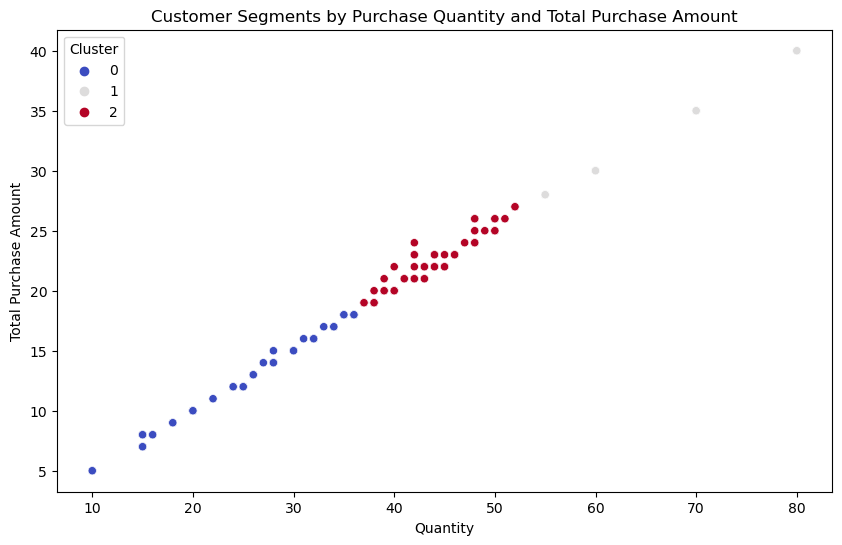

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = df[['Likes', 'Retweets']]  # Features for segmentation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Retweets', hue='Cluster', data=df, palette='coolwarm')
plt.title('Customer Segments by Purchase Quantity and Total Purchase Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Cluster')
plt.show()

<Figure size 1200x600 with 0 Axes>

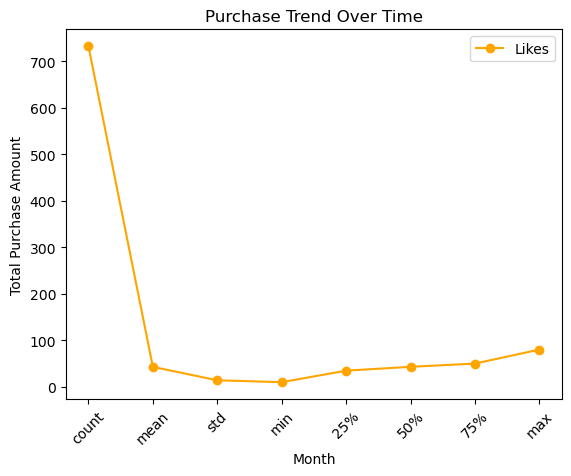

In [42]:
plt.figure(figsize=(12, 6))
basic_stats.plot(kind='line', color='orange', marker='o')
plt.title('Purchase Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

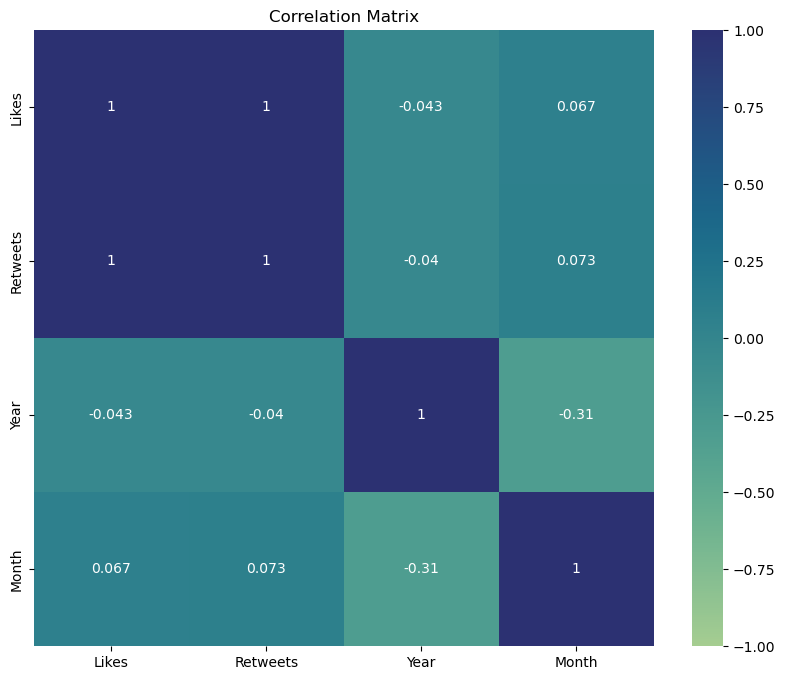

In [43]:
new=['Likes','Retweets','Year','Month']
correlation_matrix = df[new].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest',vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()